In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.impute import SimpleImputer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Load training data
train = pd.read_csv("/kaggle/input/titanic/train.csv")
# Display basic information
print("Dataset Shape:", train.shape)
print("\nColumn Data Types:\n", train.dtypes)
#Display first few rows
train.head()
#train.info()
#Summary statistics
train.describe()



Dataset Shape: (891, 12)

Column Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#Load test data
test = pd.read_csv("/kaggle/input/titanic/test.csv")
# Display basic information
print("Dataset Shape:", test.shape)
print("\nColumn Data Types:\n", test.dtypes)
#Display first few rows
test.head()
#test.info()
#Summary statistics
test.describe()


Dataset Shape: (418, 11)

Column Data Types:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
#Check for missing train values
missing_values = train.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", train.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Check for missing test values
missing_values = test.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", test.isnull().sum())


Missing Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
#Covert categorical data to numerical
train['Sex'] = train['Sex'].map({'female':0,'male':1})
test['Sex'] = test['Sex'].map({'female':0,'male':1})

train['Embarked'] = train['Embarked'].map({'C':0,'Q':1,'S':2})
test['Embarked'] = test['Embarked'].map({'C':0,'Q':1, 'S':2})




In [7]:
# Data Cleaning and Feature Engineering
# Fill missing Age values with the median age
age_imputer = SimpleImputer(strategy='median')
train['Age'] = age_imputer.fit_transform(train[['Age']])
test['Age'] = age_imputer.fit_transform(test[['Age']])

# Fill missing Embarked values with the most common port
embarked_imputer = SimpleImputer(strategy='most_frequent')
train['Embarked']= embarked_imputer.fit_transform(train[['Embarked']])
test['Embarked']= embarked_imputer.fit_transform(test[['Embarked']])

# Fill missing Fare values in the test set
fare_imputer = SimpleImputer(strategy = 'median')
test['Fare'] = fare_imputer.fit_transform(test[['Fare']])


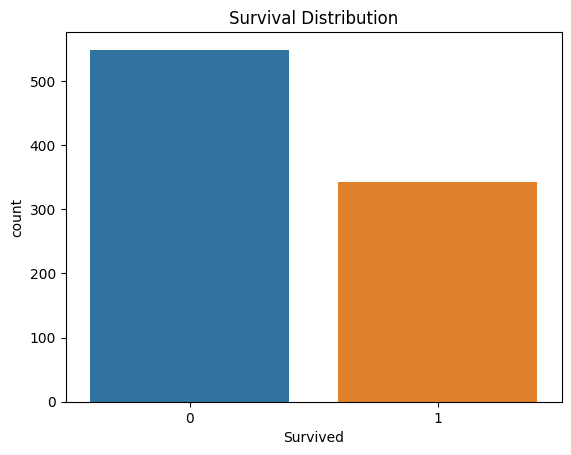

In [8]:
#distribution of survived vs. not survived
sns.countplot(x='Survived', data=train)
plt.title('Survival Distribution')
plt.show()

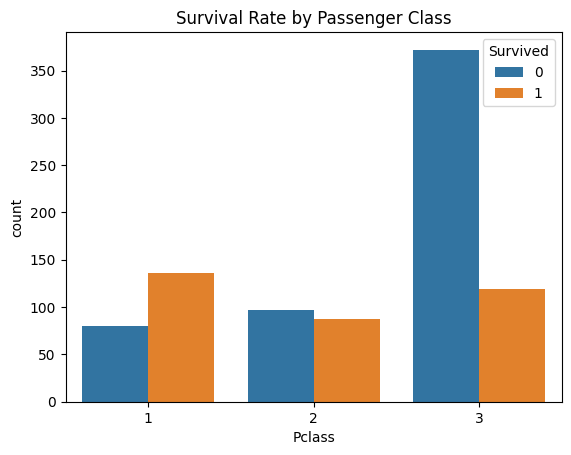

In [9]:
# Visualize the survival rate by passenger class
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()

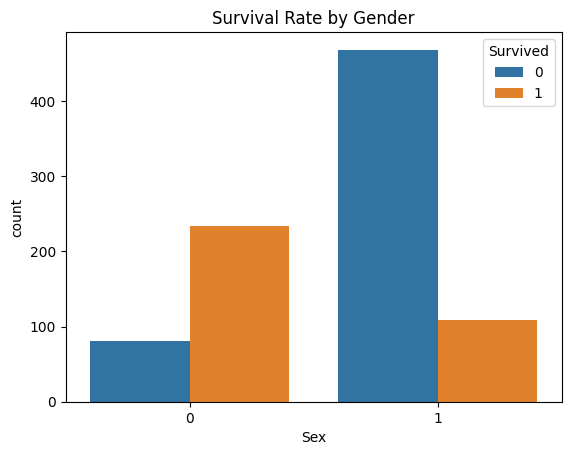

In [10]:
# Visualize the survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

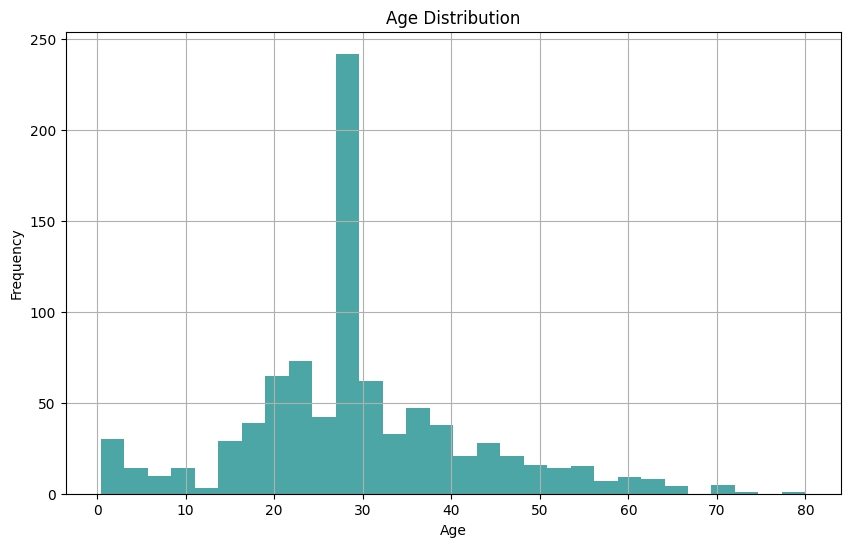

In [11]:
# Visualize the survival rate by age
plt.figure(figsize=(10, 6))
train['Age'].hist(bins=30, color='teal', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#sns.boxplot(x='Survived', y='Age', data=train)
#plt.title('Survival Rate by Age')
#plt.show()

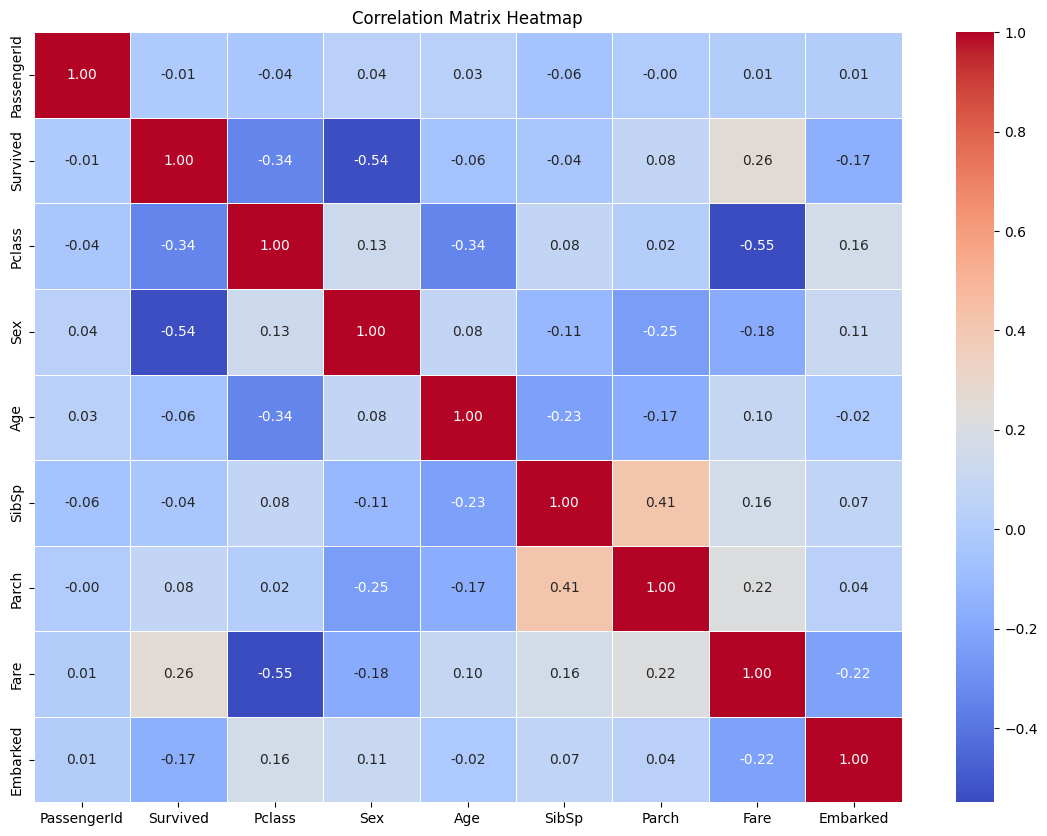

In [12]:
# Compute correlation matrix
correlation_matrix = train.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [13]:

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x = train[features]
y = train['Survived']

# Split data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Predict on the test set
test['Survived'] = model.predict(test[features])

Validation Accuracy: 0.82


In [14]:
train_clf = DecisionTreeClassifier (criterion = 'gini', max_depth = 5, random_state=42)
train_clf.fit(x_train, y_train)

#Predict on test set
y_pred_test = train_clf.predict(x_test)

#Evaluate the Decision Tree model
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Decision Tree Classifier Performance:
Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



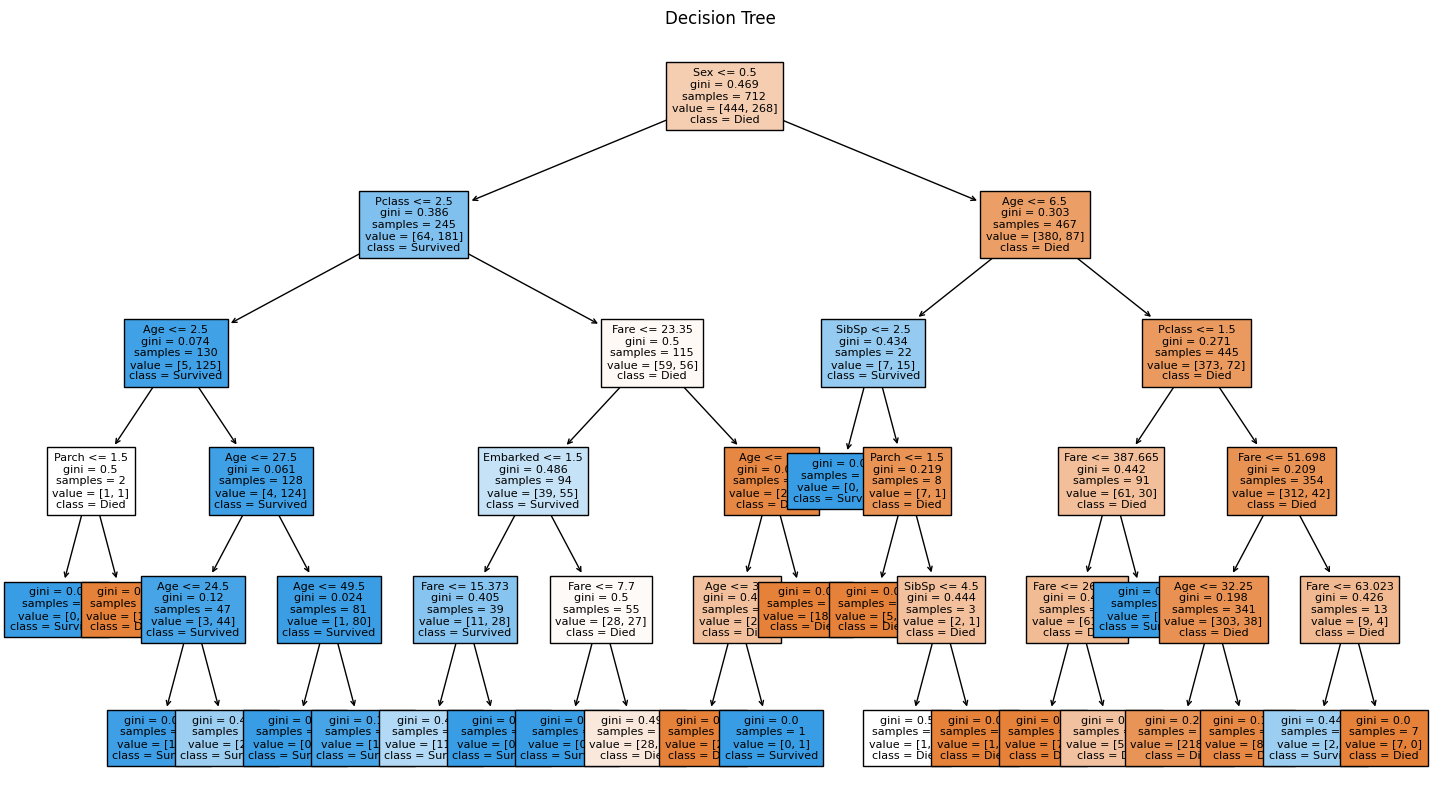

In [15]:
#Visualize Decision Tree
plt.figure(figsize =(18,10))
tree.plot_tree(train_clf,feature_names= x.columns, class_names=["Died","Survived"], filled=True, fontsize=8)
plt.title("Decision Tree")
plt.show()

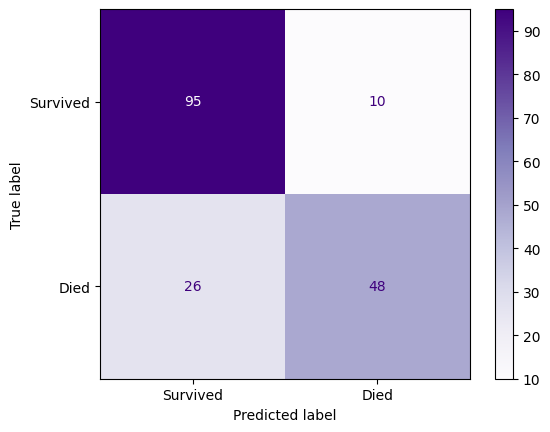

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)

#Visualize
disp = ConfusionMatrixDisplay(confusion_matrix =cm, display_labels =["Survived","Died"])
disp.plot(cmap=plt.cm.Purples)
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

p_grid = {
     'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), p_grid, cv=5, scoring ='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8300305328474344


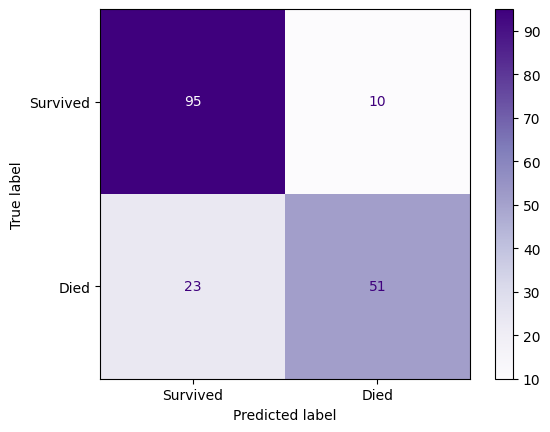

In [18]:


y_pred_test = grid_search.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)

# Visualize
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Died"])
disp.plot(cmap=plt.cm.Purples)
plt.show()



In [19]:
#Finished!! Create submission file
output= test[['PassengerId', 'Survived']]
output.to_csv('titanic_submission.csv', index = False)

print("FINISHED!")

FINISHED!
